In [1]:
import numpy as np
import pandas as pd






In [2]:
import os
# 确定文件路径
csv_path=os.path.join("D:\Code\Python\Advanced Machine Learning Project\cardio_dataset.csv")
# turn the dataset into a Pandas DataFrame object
cardio_dataset=pd.read_csv(csv_path)

In [3]:
#1

In [4]:
cardio_dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
cardio_dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#2

In [8]:


# 使用哈希函数来分离测试集

import hashlib

# identifier,就是样本里面的id列，hash代表使用的哈希函数
def test_set_check(identifier, test_ratio, hash):
    
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# data就是我们的总的数据集，id_column就是我们数据集里的id列，hash=来选用哈希函数
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    # 选取数据集里面的id列
    ids = data[id_column]  
    # 浏览器收藏夹——知识积累——python；得到测试集样本对应的id（组成的数组）
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    # ~in_test_set：除测试集之外的，做训练集。
    return data.loc[~in_test_set], data.loc[in_test_set]



# train_set_hash, test_set_hash = split_train_test_by_id(cardio_dataset, 0.2, "id")
# train_set_hash.info() 
# 由程序运行结果看，分出来的训练集与测试集的比例并不一定严格等于设定的比例。这是因为
# 哈希函数只是尽量使样本的对应哈希值均匀分布，并且样本对应哈希值的分布也不是严格均匀
# 的，这里我们是取的哈希值的最后一个字节（8位），可能在一些地方比较密集，一些地方比较
# 稀疏。

In [9]:
train_set_hash, test_set_hash = split_train_test_by_id(cardio_dataset, 0.2, "id")
test_set_hash.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14243 entries, 4 to 69999
Data columns (total 13 columns):
id             14243 non-null int64
age            14243 non-null int64
gender         14243 non-null int64
height         14243 non-null int64
weight         14243 non-null float64
ap_hi          14243 non-null int64
ap_lo          14243 non-null int64
cholesterol    14243 non-null int64
gluc           14243 non-null int64
smoke          14243 non-null int64
alco           14243 non-null int64
active         14243 non-null int64
cardio         14243 non-null int64
dtypes: float64(1), int64(12)
memory usage: 1.5 MB


In [10]:
from sklearn.model_selection import train_test_split
train_set_sk, test_set_sk = train_test_split(cardio_dataset, test_size=0.2, random_state=42)
train_set_sk.info() 
# 这个也有缺点，没有按照性别分层抽样。不过可视情况，看性别对这个分类有无影响。或者其他
# 重要的attribute，问刘翔，分层抽样来分测试集和训练集。pdf P76

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 13 columns):
id             56000 non-null int64
age            56000 non-null int64
gender         56000 non-null int64
height         56000 non-null int64
weight         56000 non-null float64
ap_hi          56000 non-null int64
ap_lo          56000 non-null int64
cholesterol    56000 non-null int64
gluc           56000 non-null int64
smoke          56000 non-null int64
alco           56000 non-null int64
active         56000 non-null int64
cardio         56000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.0 MB


In [11]:
# 根据smoke分层抽样
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cardio_dataset, cardio_dataset["smoke"]):
    cardio_train_set = cardio_dataset.loc[train_index] 
    cardio_test_set = cardio_dataset.loc[test_index]
    
print("proportion in test set:\n",cardio_test_set['smoke'].value_counts()/len(cardio_test_set),"\n")
print("proportion in whole dataset:\n",cardio_dataset['smoke'].value_counts()/len(cardio_dataset))

proportion in test set:
 0    0.911857
1    0.088143
Name: smoke, dtype: float64 

proportion in whole dataset:
 0    0.911871
1    0.088129
Name: smoke, dtype: float64


In [12]:
#3


In [13]:
# make a copy
cardio = cardio_train_set.copy()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlations = cardio.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

<Figure size 1000x1000 with 2 Axes>

In [17]:
# 3.Experimenting with Attribute Combinations

# 通过结合两个feature来得到对模型更有用的新的feature
# 例如：结合身高体重得到BMI指数
# BMI是kg/m**2(体重除以身高的平方)，体重用于计算的数会远大于身高，因此BMI会与体重高度线性相关

# 这个操作会“cardio数据集”新增加一个feature
# 新增BMI：kg/(m**2)
cardio["BMI"]=cardio["weight"]/(cardio["height"]/100)**2
# 新增平均动脉压MAP=1/3 SBP + 2/3 DBP。SBP收缩压（高压），DBP舒张压（低压）。实际应用中MAP比SBP和DBP更好，详见收藏夹网页http://www.360doc.com/content/19/0719/19/11257249_849820036.shtml
cardio["MAP"]=(1/3)*cardio["ap_hi"] + (2/3)*cardio["ap_lo"]

# 但是这个数据结合之后，BMI相对于cardio的相关系数（-0.179118）比weight（0.181660）更小。
# 所以这个结合估计可能不太成功，有待考证。（书上是结合之后对target的相关系数更大了，但
# 是书上是回归target，我们的是classification target）

# 新增的MAP对cardio的相关系数是0.08，比收缩压0.05和舒张压0.06对cardio的相关系数更高，说明这个结合有效。

# 由于这个结合不是单纯的相加，因此应该不会造成多重共线性



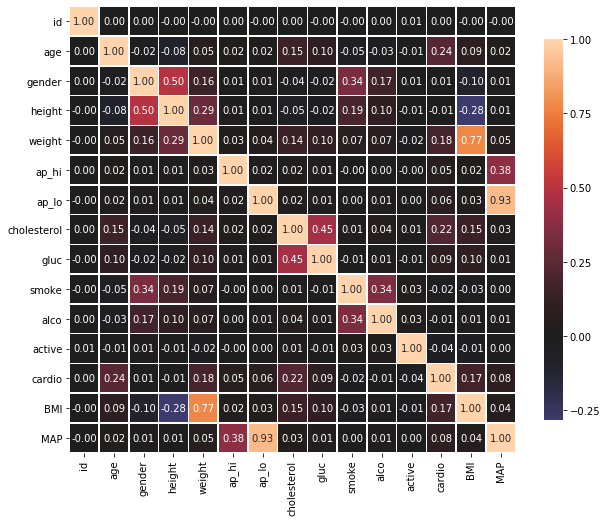

In [18]:

correlations = cardio.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()



In [ ]:
# 4

In [24]:
# 四、Prepare the Data for Machine Learning Algorithms (EDA重点) 
# 0.预处理数据前把feature和target(label) 分开

# cardio是已经分好的训练集，在三、的开头赋值的
cardio = cardio.drop("cardio",axis=1) #axis=1--按列操作；这个第一次运行就要屏蔽，否则会报错，因为清除了之后就没有target列了


cardio_targets = cardio_train_set["cardio"].copy
cardio.head(8)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,MAP
38685,55234,22611,2,164,78.0,130,80,3,1,0,1,1,128.205128,96.666667
56982,81340,17501,1,161,121.0,110,70,1,1,0,0,1,82.644628,83.333333
44208,63150,17737,2,165,78.0,120,90,1,1,0,0,0,128.205128,100.000000
28236,40363,21068,2,167,89.0,120,80,1,1,0,0,1,112.359551,93.333333
14047,20039,14492,1,156,66.0,110,70,1,1,0,0,1,151.515152,83.333333
43012,61448,18857,1,156,86.0,120,80,1,1,0,0,0,116.279070,93.333333
43165,61662,14657,1,178,96.0,130,90,1,1,0,0,0,104.166667,103.333333
15587,22270,15942,1,164,103.0,150,1000,2,1,0,0,1,97.087379,716.666667


In [25]:
# 1.Data cleaning


# 处理缺失数据

# 扔掉对应样本数据
# cardio.dropna(subset=["对应feature"])
# 扔掉这个feature
# cardio.drop("对应feature", axis=1)
# 补充失去的数据替换,用该feature的mean
# 1.普通做法
# median=cardio["对应feature"].median()
# cardio["对应feature"].fillna(median,inplace=True)

# 重点：2.sklearn
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median") # 设定填补的数据形式（中位数）
# housing_copy=housing.copy() # 要先做复制
# housing_num=housing_copy.drop("text feature",axis=1)# 去除text feature，因为只有数值型attributes能计算中位数
# imputer.fit(housing_num)    # 学习每个feature的中位数
# X=imputer.transform(housing_num)  #用中位数填充空白值

# imputer.statistics_  # 将各个feature的中位数存在这
# print(housing_num.median().values) #对应feature的中位数（和statistics_对比）



In [20]:
# 2.Handling Text and Categorical Attributes 

# one-hot encoder for text feature
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
La_encoder = LabelEncoder()
onehotencoder = OneHotEncoder() 
cardio_cat = cardio["gender"]


cardio_cat_1hot = onehotencoder.fit_transform(cardio_cat.values.reshape(-1, 1))
print(cardio_cat_1hot.toarray())

# 书上说下面这种好用，结果实践起来不好用，还是上面的好
# from sklearn.preprocessing import LabelBinarizer
# LabelBinarizer_encoder = LabelBinarizer()
# cardio_cat_1hot = encoder.fit_transform(cardio_cat.values.reshape(-1, 1))
# print(cardio_cat_1hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


C:\Users\76819\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# 5